In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.datasets import make_classification
from sklearn.datasets  import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
fv,cv = make_classification(n_samples = 1000,
                            n_features = 10,
                            n_informative = 6,
                            n_redundant = 3,
                            n_repeated = 1,
                            n_classes = 2,
                            n_clusters_per_class = 1,
                            weights = [0.5,0.5],
                            class_sep = 4,
                            random_state = 42)

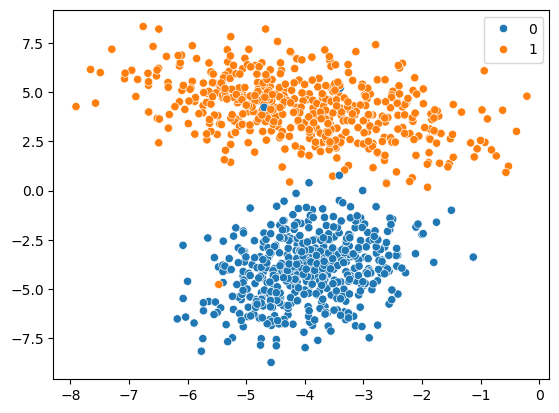

In [43]:
sns.scatterplot(x = fv[:,0],y =fv[:,1],hue = cv)
plt.show()

In [45]:
x_train,x_test,y_train,y_test =  train_test_split(fv,cv,stratify = cv,test_size = 0.2)

In [53]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [57]:
import optuna

In [59]:
def objective(trial):
    var1 = trial.suggest_categorical("var1",[("liblinear","l1"),("liblinear","l2"),("newton-cholesky","l2")])
    c = trial.suggest_categorical("c",[0.001,0.01,0.1,1,10,100])

    lor = LogisticRegression(solver = var1[0],penalty = var1[1],C = c,random_state = 42)

    return cross_validate(lor,x_train,y_train,cv = 5,scoring = "accuracy")["test_score"].mean()

In [61]:
study=optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler())

[I 2025-03-08 16:08:38,745] A new study created in memory with name: no-name-ac1bffce-ca1d-400f-a83b-6d10038dee03


In [63]:
study.optimize(objective,n_trials= 10)

C:\Users\91912\anaconda3\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\91912\anaconda3\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\91912\anaconda3\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('newton-cholesky', 'l2') which is of type tuple.
  warnings.warn(message)
[I 2025-03-08 16:08:41,043] Trial 0 finished with value: 0.9962500000000001 and parameters: {'var1': ('liblinear', 'l2'), 'c': 0.001}. Best is trial 0 

In [65]:
study.best_params

{'var1': ('liblinear', 'l2'), 'c': 0.001}

In [69]:
lor = LogisticRegression(solver = "liblinear",penalty = "l2",C = 0.1,random_state = 42)

In [71]:
lor.fit(x_train,y_train)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [73]:
lor.predict(x_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1])

In [85]:
lor.predict_proba(x_test)

array([[1.00000000e+00, 1.36592842e-16],
       [1.04494191e-12, 1.00000000e+00],
       [1.69382235e-07, 9.99999831e-01],
       [1.00000000e+00, 1.13179578e-13],
       [1.00000000e+00, 2.79729964e-18],
       [6.13642470e-12, 1.00000000e+00],
       [1.41761092e-09, 9.99999999e-01],
       [1.31845934e-09, 9.99999999e-01],
       [3.57491814e-14, 1.00000000e+00],
       [7.77156117e-15, 1.00000000e+00],
       [1.00000000e+00, 5.95238602e-19],
       [5.26587034e-06, 9.99994734e-01],
       [1.00000000e+00, 5.41779682e-13],
       [3.42335227e-09, 9.99999997e-01],
       [1.00000000e+00, 1.10838237e-16],
       [6.05209438e-10, 9.99999999e-01],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 8.58037450e-18],
       [1.00000000e+00, 8.37202653e-18],
       [1.11022302e-15, 1.00000000e+00],
       [1.25428128e-06, 9.99998746e-01],
       [1.00000000e+00, 2.56721227e-11],
       [0.00000000e+00, 1.00000000e+00],
       [4.25873070e-09, 9.99999996e-01],
       [1.730482

In [87]:
np.where(lor.predict_proba(x_test)[:,1]>=0.5,1,0)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1])

In [89]:
lor.intercept_

array([0.07718981])

In [91]:
lor.coef_

array([[-0.22043725,  0.67530355, -0.72252408, -0.05194068,  0.63042029,
        -0.69283049, -0.1179991 , -0.72766465, -0.69283049,  0.6913788 ]])